# Apresentação

#### Prazer meu nome é Kayo Carvalho, sou estutande do curso de Ciência de Dados e IA pela UniDSBCO.
> Esse Projeto foi iniciado através do [BOOTCAMP CDP](https://linktr.ee/cienciadosdados) ministrado pelo Mestre Jedi EDUARDO.
Fui um pouco além do que foi solicitado no desafio e criei um obra fictícia, então todos os nomes foram gerados de forma aleatoria sem vinculo com o mundo real.

# Previsão de Predisposição à Diabetes

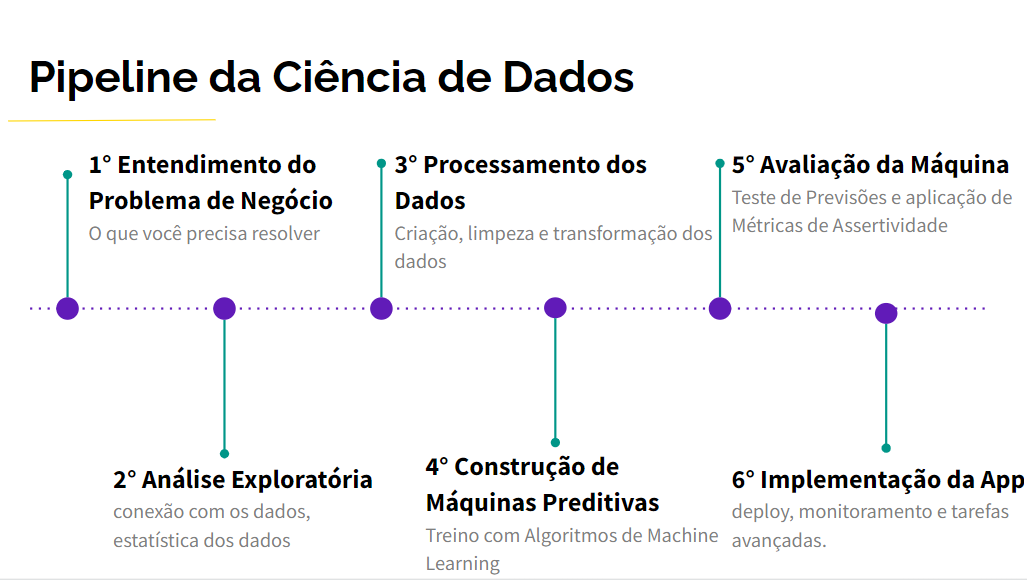

## **1º** Entendimento do Problema de Negócio

#### Problema da empresa:
> Nosso cliente é o **Hospital Panaceia**. Eles nos trouzeram um dataset que inclui dados sobre exames e informações sobre os pacientes que passaram pelo hospital para teste de diabetes. Esses dados estão a nivel de paciente; em outras palavras há uma linha para cada paciente, onde esse dataset fornece dados desde abertura do hospital, assim podendo ter pacientes repetidos no dataset, por outro lado pondendo ter ou não as outras metricas repetidas.

#### Objetivo:
> Desenvolver um modelo que preveja se o paciente tem predisposição de ter ou não Diabetes.

 #### Plano de ação
 * Quanto custará?
 > *Opcional*: Devido a falta de informção foi feita uma pesquisa em outros hospital e houve uma cobrança para adquirir as informações para nosso modelo preditivo, foi cobrado **R$ 5.000,00** pelo **Hospital Asclépio** para um dataset com 10.000 registros.
 * Como será feito?
 > A principio usaremos a nossa base dados para criar o modelo preditivo, assim faremos teste entre algoritimos para ver seu desempenho e verificar o custo do verdadeiro e falsos positivos.
 * Quando será feito?
 > Projeto vai ser iniciado no quarto trimestre de 2022.
 * O que será feito?
 > Analisar as informações contidas no historico dos pacientes informados no dicionario de dados.
 * Por que será feito?
 > Para auxiliar os médicos do Hospital para agilizar no processo de identificar e combater a Diabetes dos pacientes que procuram atendimento no Hospital.
 * Onde será feito?
 > Será feito no setor de TI do **Hospital Panaceia**.
 * Quem será o responsável ou executor?
 > Responsavel será o Cientista *Kayo Carvalho* liderando uma equipe de analista e cientista de dados.

## **2º** Analise Exploratória

Conectando ao Google Drive

In [1]:
# Para uso do google colab
# from google.colab import drive
# drive.mount('/content/drive')


Importando as bibliotecas

In [2]:
# Carregando arquivo csv usando Pandas
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
import numpy as np

#PréProcessamento
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from sklearn.model_selection import train_test_split

#Máquinas Preditivas
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 

import warnings
warnings.filterwarnings('ignore')

Dicionario de Dados

**Informações sobre os atributos:**
1. *preg* : Número de gravidez.
2. *plas* : Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose.
3. *pres* : Pressão arterial diastólica (mm Hg).
4. *skin* : Espessura da dobra cutânea do tríceps (mm).
5. *test* : Insulina sérica de 2 horas (mu U/ml).
6. *mass* : Índice de massa corporal (peso em kg/(altura em m)^2).
7. *pedi* : Função hereditária do diabetes.
8. *age* : Idade (anos).
9. *class* : Variável de classe (0 ou 1).


Transformando o dataset em um dataframe

In [3]:
# dataset = '/content/drive/MyDrive/Dados/diabetes.csv'
dataset = 'diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [4]:
dataframe = pd.read_csv(dataset,names=colunas, header=0)

In [5]:
dataframe.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Estatística Descritiva
> Será apresentado informações dos dados brutos que veio no dataset, onde os mesmo podem sofrer alterações na etapa de limpeza dos dados.

In [6]:
#Visualizando informações sobre o dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


O dataframe contem 768 linhas com 9 colunas, onde dessas 9 colunas 7 estão com o formato de números inteiros e 2 com o formato de números racionais. 

In [7]:
# Visualização do topo do dataframe
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Visualização do fim do dataframe
dataframe.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# Sumário estatístico do dataframe
dataframe.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


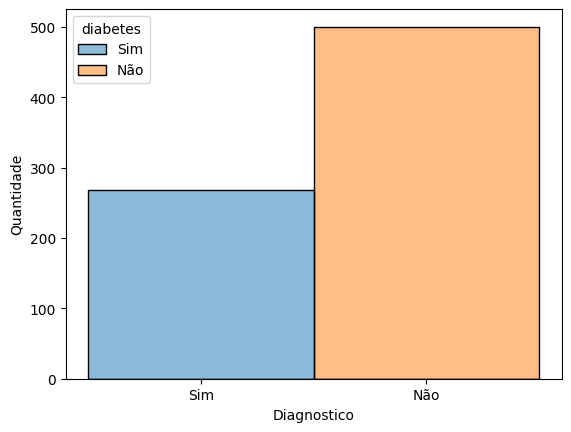

In [10]:
# Distribuição da coluna class
diagnostico = np.where(dataframe['class'] == 0,'Não','Sim') # Criei um variavel com categoria para facilitar a visualização das informações
df_diagnosticos = pd.DataFrame(diagnostico,columns=['diabetes'])
ax1 = sns.histplot(data=df_diagnosticos,x='diabetes',hue='diabetes')
ax1.set(xlabel='Diagnostico',ylabel='Quantidade');

O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. Se a associação entre os elementos não for linear, o coeficiente não será representado adequadamente.

O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

Fonte: [Question Pro](https://www.questionpro.com/blog/pt-br/correlacao-de-pearson/)

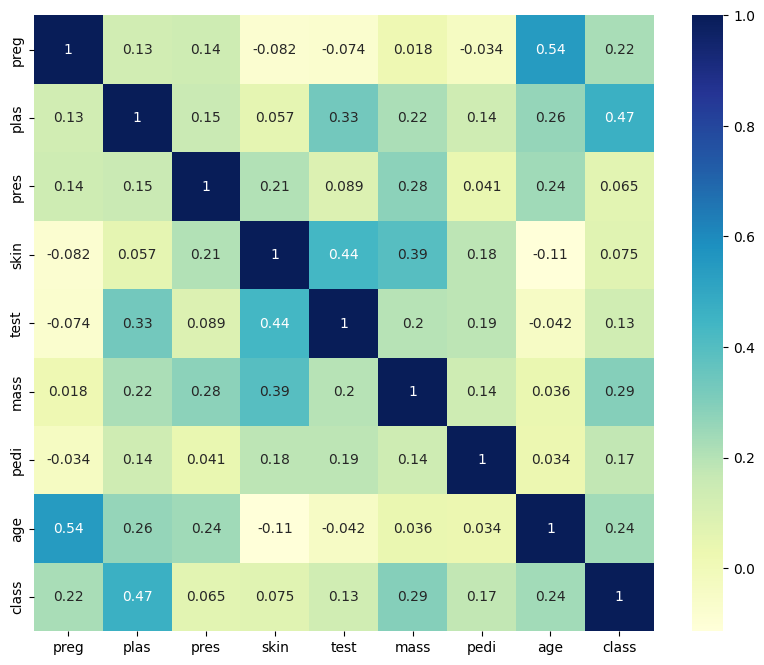

In [11]:
# Correlação de Pearson
fig2, ax2 = plt.subplots(figsize=((10,8)))
sns.heatmap(dataframe.corr(),cmap='YlGnBu',annot=True,ax=ax2)
plt.show()

Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [12]:
# Verificando o skew de cada atributo
dataframe.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

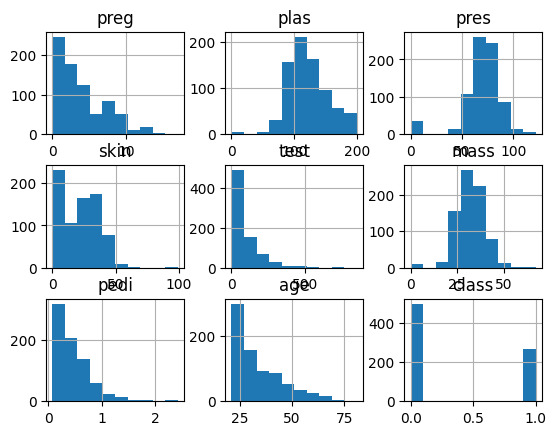

In [14]:
# Histograma Univariado
dataframe.hist()
plt.show()

## **3º** Processamento de dados

#### Pré-Processamento (Preparando os dados para Machine Learning)

O pré-processamento é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.
Essa etapa é de grande importância, pois será determinante para a qualidade final dos dados que serão analisados. Ela pode, inclusive, impactar no modelo de previsão, gerado a partir dos dados.

##### Normalização dos dados - Método 1

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [16]:
# Separando o array em componentes de input "X" e output "y"
X = dataframe.values[:,:-1]
y = dataframe.values[-1]

In [19]:
# Transformando os dados para a mesma escala (entre 0 e 1)
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [21]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", dataframe.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]
